In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['figure.autolayout'] = True
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')


In [4]:
yf_prices = yf.download(['AAPL', 'MSFT', 'GOOG', 'META'], start='2015-01-01')

[*********************100%***********************]  4 of 4 completed


# 1. Single Asset Simulation

In [5]:
prices = yf_prices['Adj Close']['AAPL']

In [6]:
# 1. compute log-returns of underlying asset
rs = prices.apply(np.log).diff(1).fillna(0)

In [7]:
rs

Date
2015-01-02    0.000000
2015-01-05   -0.028576
2015-01-06    0.000094
2015-01-07    0.013925
2015-01-08    0.037703
                ...   
2023-05-03   -0.006488
2023-05-04   -0.009963
2023-05-05    0.045859
2023-05-08   -0.000403
2023-05-09   -0.010021
Name: AAPL, Length: 2102, dtype: float64

In [8]:
# 2. compute the signal
w1 = 5
w2 = 22
ma_x = prices.rolling(w1).mean() - prices.rolling(w2).mean()

<Axes: title={'center': 'Position'}, xlabel='Date'>

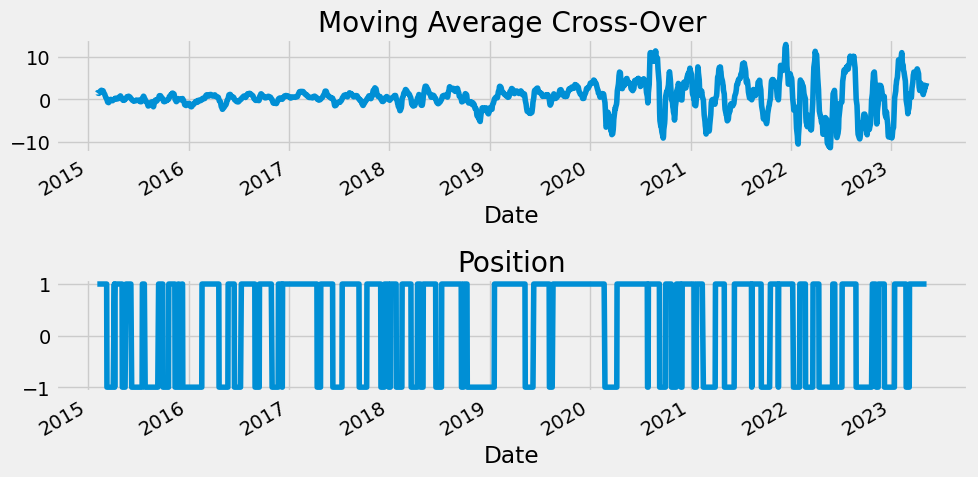

In [9]:
# 3. translate signal to actual trading positions (long or short)
pos = ma_x.apply(np.sign)  # +1 if long, -1 if short
fig, ax = plt.subplots(2, 1)
ma_x.plot(ax=ax[0], title='Moving Average Cross-Over')
pos.plot(ax=ax[1], title='Position')

In [10]:
# 4. compute strategy returns by adjusting the log-returns of hte underlying asset according to the positions
my_rs = pos.shift(1) * rs

<Axes: title={'center': 'Strategy Performance'}, xlabel='Date'>

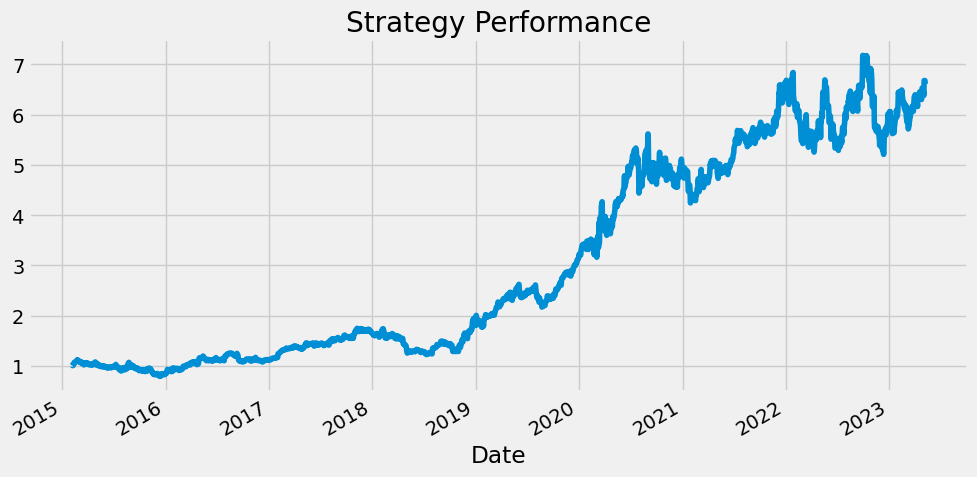

In [11]:
# 5. Compute the backtest by using the cumulative sum and applying the exponential function.
my_rs.cumsum().apply(np.exp).plot(title='Strategy Performance')

# 5.2. Multi Assets Backtest

In [12]:
prices = yf_prices['Adj Close']
rs = prices.apply(np.log).diff(1).fillna(0)

In [13]:
w1 = 5
w2 = 22
ma_x = prices.rolling(w1).mean() - prices.rolling(w2).mean()

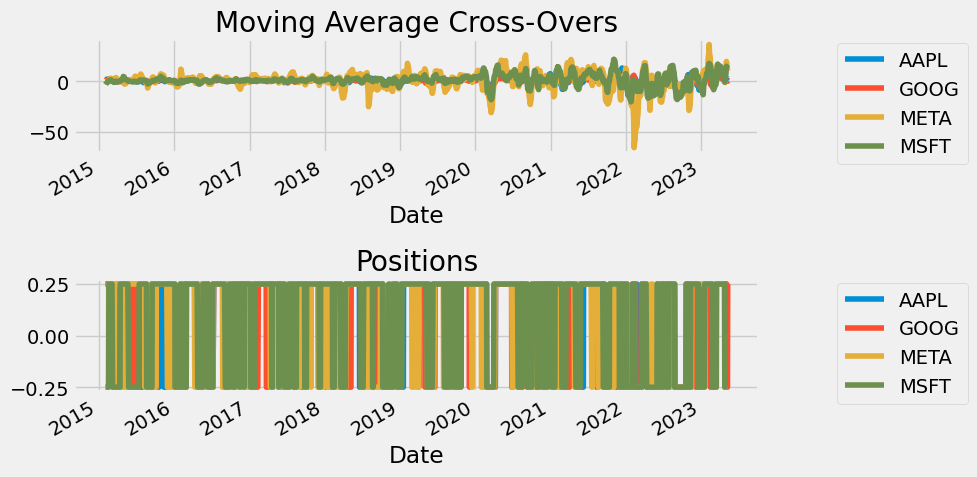

In [14]:
pos=ma_x.apply(np.sign)
pos/=pos.abs().sum(1).values.reshape(-1,1)

fig, ax = plt.subplots(2,1)
ma_x.plot(ax=ax[0], title='Moving Average Cross-Overs')
ax[0].legend(bbox_to_anchor=(1.1,1.05))
pos.plot(ax=ax[1], title='Positions')
ax[1].legend(bbox_to_anchor=(1.1,1.05))
plt.savefig('tmp.png')

<Axes: title={'center': 'Strategy Performance'}, xlabel='Date'>

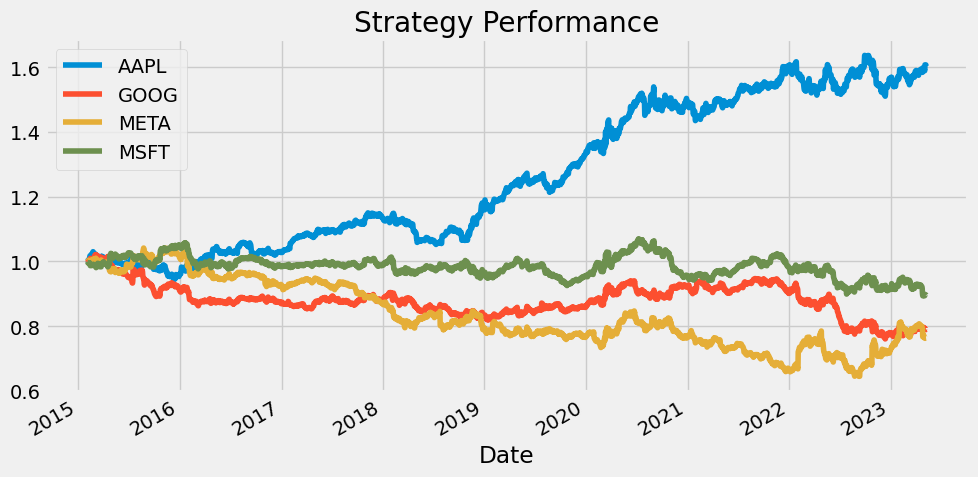

In [15]:
my_rs=(pos.shift(1)*rs)
my_rs.cumsum().apply(np.exp).plot(title='Strategy Performance')

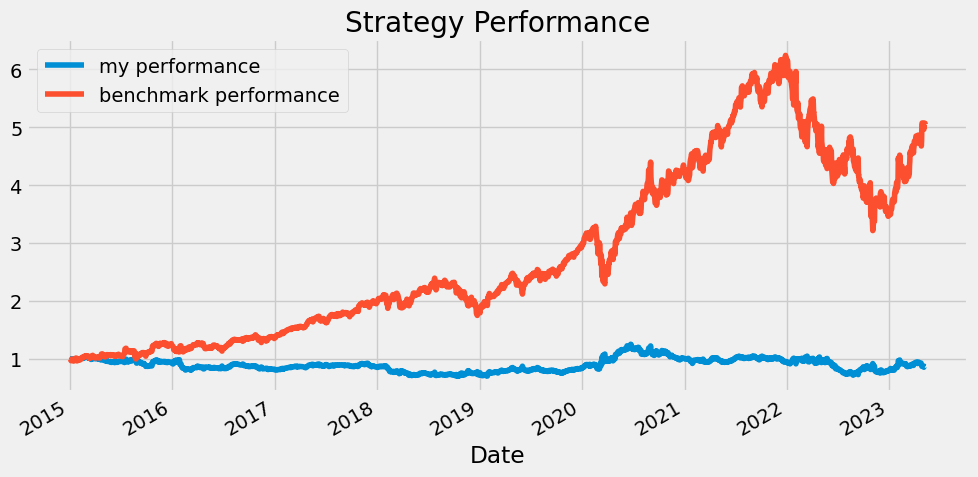

In [19]:
my_rs = (pos.shift(1)*rs).sum(1)

my_rs.cumsum().apply(np.exp).plot(title='Strategy Performance')
rs.mean(1).cumsum().apply(np.exp).plot()
plt.legend(['my performance', 'benchmark performance'])